In [19]:
import pandas as pd
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
ADDITIONAL_STOPWORDS = ['covfefe']
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [25]:
df = pd.read_csv('Combined Foreign cleaned.csv')
df.head()

,full text
0,ii outline title national enforcement guidelin...
1,iii contents outline ii purpose objectives sco...
2,purpose purpose national enforcement guideline...
3,relation proper control road rule guidelines p...
4,levels driving automation number vehicles road...


In [26]:
def basic_clean(text):
    """
A simple function to clean up the data. All the words that are not designated as a stop word is then lemmatized after
encoding and basic regex parsing are performed.
    """
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
        .encode('ascii', 'ignore')
        .decode('utf-8', 'ignore')
        .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [27]:
words = basic_clean(''.join(str(df['full text'].tolist())))
print(words)

['ii', 'outline', 'title', 'national', 'enforcement', 'guideline', 'automated', 'vehicle', 'type', 'report', 'guideline', 'purpose', 'assist', 'police', 'enforce', 'road', 'traffic', 'law', 'relation', 'automated', 'road', 'vehicle', 'abstract', 'national', 'enforcement', 'guideline', 'provide', 'guidance', 'requirement', 'proper', 'control', 'australian', 'road', 'rule', 'apply', 'vehicle', 'automated', 'function', 'guideline', 'confirm', 'human', 'driver', 'responsible', 'compliance', 'road', 'traffic', 'law', 'vehicle', 'conditional', 'automation', 'engaged', 'point', 'time', 'key', 'word', 'ehicle', 'automated', 'function', 'national', 'enforcement', 'guideline', 'australian', 'road', 'rule', 'contact', 'national', 'transport', 'commis', 'ion', 'evel', 'bourke', 'street', 'melbourne', 'vic', 'ph', 'email', 'enquiry', 'ntc', 'gov', 'au', 'version', 'isbn', 'iii', 'content', 'outline', 'ii', 'purpose', 'objective', 'scope', 'matter', 'scope', 'matter', 'scope', 'level', 'driving', 'a

In [29]:
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]

(self, driving, car)                193
(automated, driving, system)        153
(app, based, ride)                  132
(based, ride, hailing)              120
(connected, automated, vehicle)     114
(self, driving, vehicle)            104
(canada, automotive, future)        101
(choosing, canada, automotive)      100
(road, traffic, act)                 95
(connected, autonomous, vehicle)     94
(transport, sharing, option)         81
(ride, hailing, service)             75
(shared, mobility, service)          70
(general, safety, duty)              69
(case, vehicle, data)                57
(automated, vehicle, plan)           57
(section, road, traffic)             52
(case, vehicle, could)               49
(adaptive, cruise, control)          46
(road, traffic, law)                 45
dtype: int64

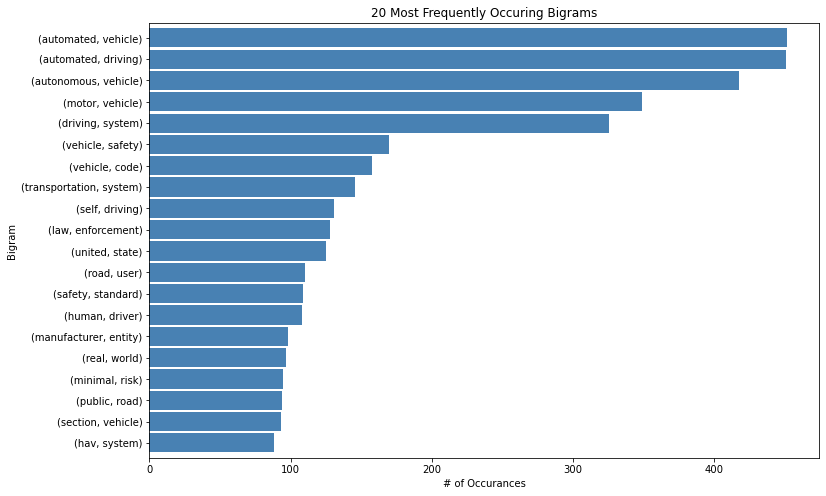

In [17]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]
bigrams_series.sort_values().plot.barh(color=(72/255, 129/255, 179/255, 1), width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')
plt.savefig("bigrams_series US.png", bbox_inches='tight')
#figure(figsize=(8, 6), dpi=100)

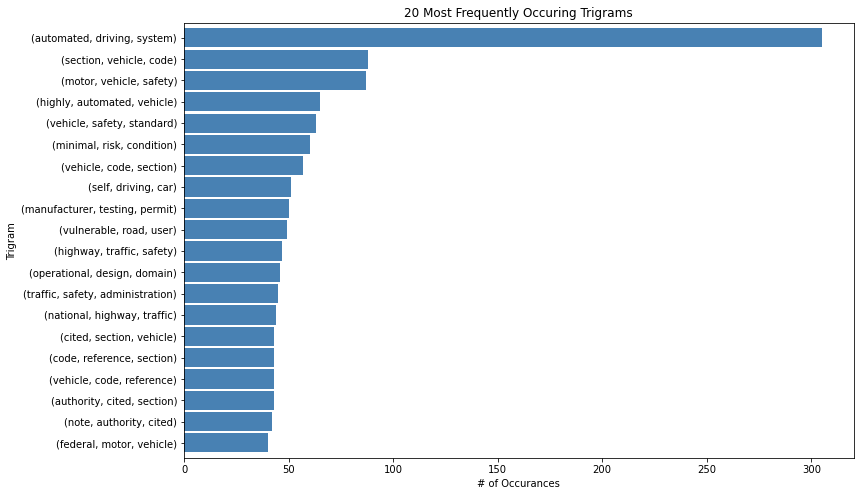

In [18]:
trigrams_series.sort_values().plot.barh(color=(72/255, 129/255, 179/255, 1), width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')
plt.savefig("trigrams_series US.png", bbox_inches='tight')